## Adult income - analysis & classification


### The data comes from The Census Income Data Set from the UCI Machine Learning Repository. Is also known as Adult income or adult dataset.

#### The purpose of classification is to predict, whether an income exceeds 50k per year.

Let`s import this and that

In [1]:
# To execute the multiple lines of code at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

### Data import

In [3]:
df=pd.read_csv(r'C:\Data\adult.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
(2809/48842)*100

5.751197739650301

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Check and fill in missing values

In [8]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<AxesSubplot:>

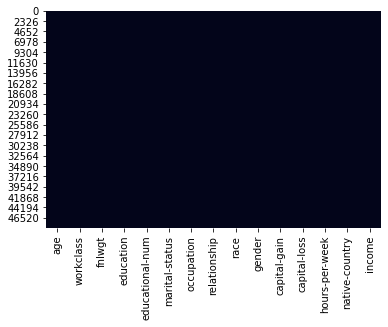

In [9]:
sns.heatmap(df.isnull(), cbar=False)

In [10]:
df_obj = df.select_dtypes(['object'])
print(df_obj)

          workclass     education      marital-status         occupation  \
0           Private          11th       Never-married  Machine-op-inspct   
1           Private       HS-grad  Married-civ-spouse    Farming-fishing   
2         Local-gov    Assoc-acdm  Married-civ-spouse    Protective-serv   
3           Private  Some-college  Married-civ-spouse  Machine-op-inspct   
4                 ?  Some-college       Never-married                  ?   
...             ...           ...                 ...                ...   
48837       Private    Assoc-acdm  Married-civ-spouse       Tech-support   
48838       Private       HS-grad  Married-civ-spouse  Machine-op-inspct   
48839       Private       HS-grad             Widowed       Adm-clerical   
48840       Private       HS-grad       Never-married       Adm-clerical   
48841  Self-emp-inc       HS-grad  Married-civ-spouse    Exec-managerial   

      relationship   race  gender native-country income  
0        Own-child  Black    

In [11]:
df[df_obj.columns] = df_obj.apply(lambda x:x.str.strip())

In [12]:
for each in df.columns:
    df[each] = df[each].replace(to_replace='?',value=np.nan)

In [13]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [14]:
np.round((df.isna().sum()/df.shape[0])*100,3).astype(str) + '%'

age                  0.0%
workclass          5.731%
fnlwgt               0.0%
education            0.0%
educational-num      0.0%
marital-status       0.0%
occupation         5.751%
relationship         0.0%
race                 0.0%
gender               0.0%
capital-gain         0.0%
capital-loss         0.0%
hours-per-week       0.0%
native-country     1.755%
income               0.0%
dtype: object

<AxesSubplot:>

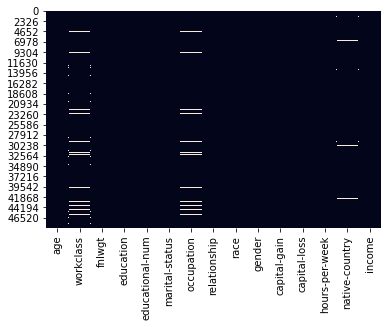

In [15]:
sns.heatmap(df.isnull(), cbar=False)

In [16]:
df.shape

(48842, 15)

In [17]:
df=df.dropna(axis=0, how='any')

<AxesSubplot:>

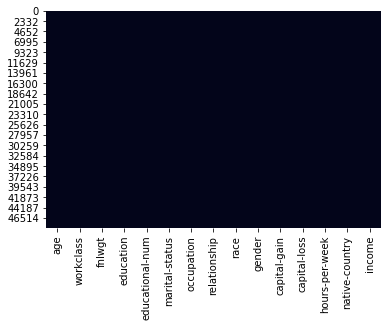

In [18]:
sns.heatmap(df.isnull(), cbar=False)

In [19]:
df.shape

(45222, 15)

In [20]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [21]:
df = df.drop_duplicates(keep='first')

In [22]:
print(df.shape)

(45175, 15)


### Exploratory Data Analysis

In [23]:
numerical_cols = df.select_dtypes(include=['int64','float64'])
print(numerical_cols.columns)

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [24]:
categorical_cols = df.select_dtypes(include=['object'])
print(categorical_cols.columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


<AxesSubplot:>

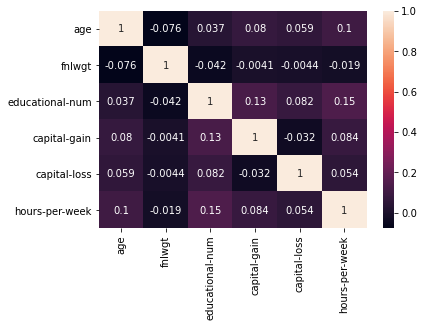

In [25]:
sns.heatmap(numerical_cols.corr(), annot=True)

In [26]:
income = df.values[:,-1]
count = Counter(income)
print('Total:',len(income))
for k,v in count.items():
    per = v / len(income) * 100
    print('Class: %s, Count=%d, Percentage=%.3f%%' % (k, v, per))
    print(k,v)

Total: 45175
Class: <=50K, Count=33973, Percentage=75.203%
<=50K 33973
Class: >50K, Count=11202, Percentage=24.797%
>50K 11202


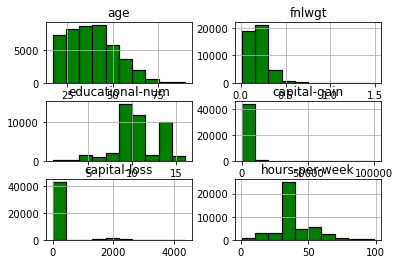

In [27]:
numerical_cols.hist(edgecolor='black', linewidth=1.2, color='green')
plt.show();

Miniumum age: 17
Maximum age: 90


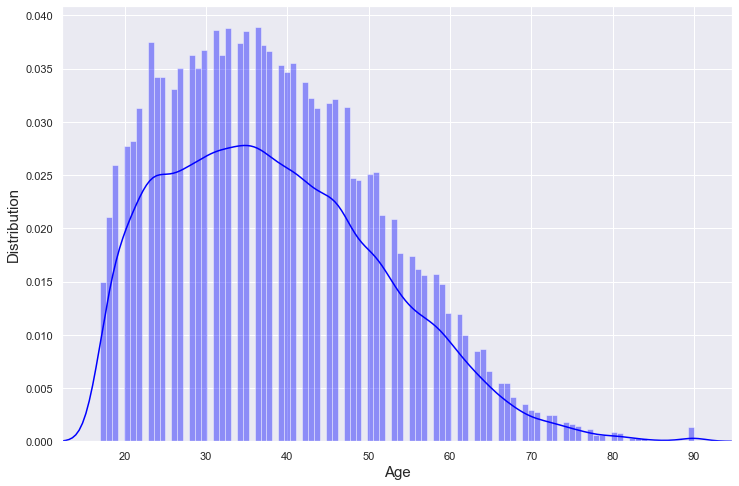

In [28]:
print('Miniumum age:', df['age'].min())
print('Maximum age:', df['age'].max())
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style='darkgrid');
sns.distplot(df['age'], bins=100, color='blue');
plt.ylabel("Distribution", fontsize=15);
plt.xlabel("Age", fontsize=15);
plt.margins(x=0);

Private             73.629220
Self-emp-not-inc     8.400664
Local-gov            6.862203
State-gov            4.307692
Self-emp-inc         3.641395
Federal-gov          3.112341
Without-pay          0.046486
Name: workclass, dtype: float64


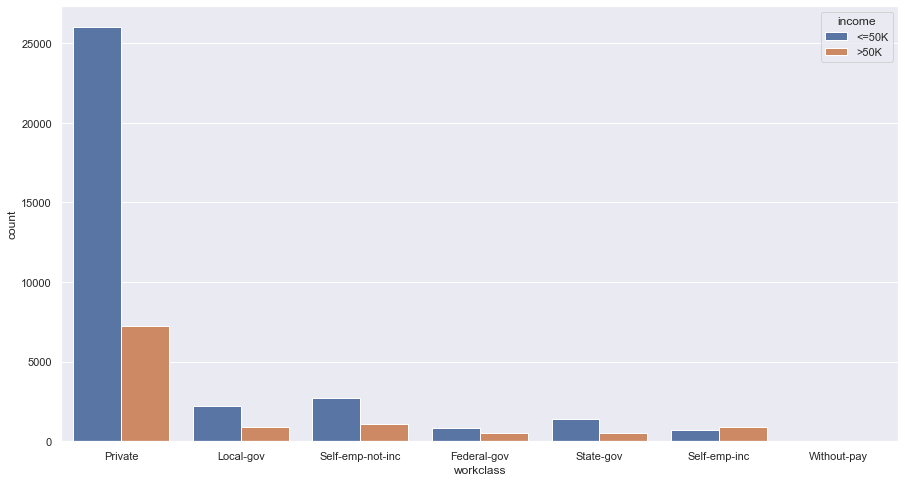

In [29]:
print(df['workclass'].value_counts()/df['workclass'].count()*100)
plt.figure(figsize=(15,8));
sns.countplot(df['workclass'], hue=df['income']);

Craft-repair         13.303818
Prof-specialty       13.283896
Exec-managerial      13.237410
Adm-clerical         12.252352
Sales                11.964582
Other-service        10.636414
Machine-op-inspct     6.563365
Transport-moving      5.126729
Handlers-cleaners     4.526840
Farming-fishing       3.265080
Tech-support          3.141118
Protective-serv       2.158273
Priv-house-serv       0.509131
Armed-Forces          0.030991
Name: occupation, dtype: float64


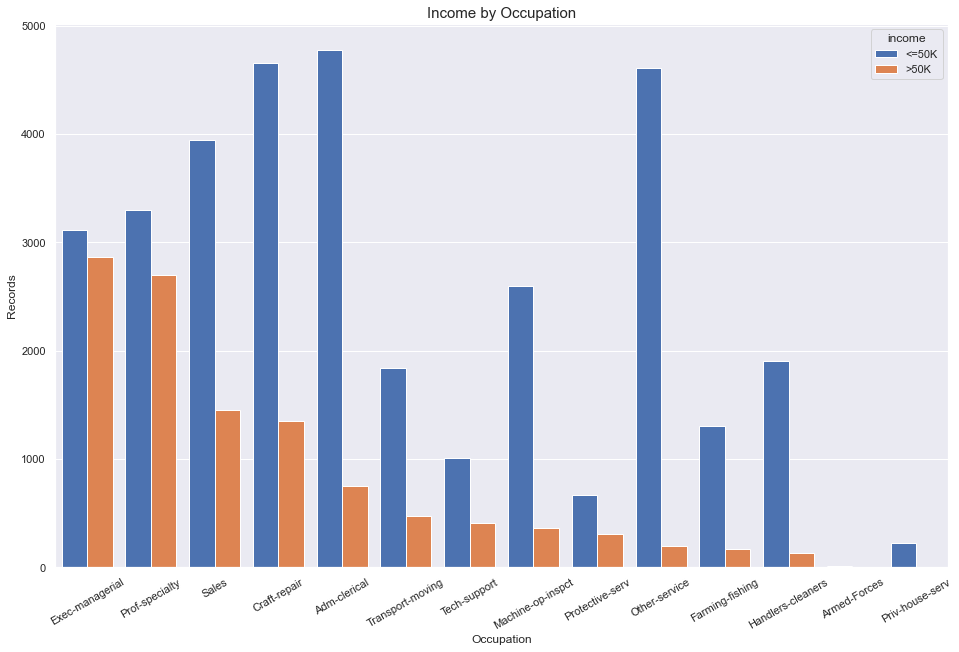

In [30]:
print(df['occupation'].value_counts()/df['occupation'].count()*100)
order = (df.occupation[df.income=='>50K'].value_counts()/df.shape[0]).index
total = df.shape[0]
plt.rcParams['figure.figsize'] = [16, 10]
sns.countplot(x='occupation', hue='income', order=order, data=df, saturation=1)
plt.title('Income by Occupation', fontsize=15)
plt.ylabel('Records')
plt.xlabel('Occupation')
plt.xticks(rotation=30)
plt.show();

HS-grad         32.695075
Some-college    21.885999
Bachelors       16.732706
Masters          5.562811
Assoc-voc        4.334256
11th             3.583841
Assoc-acdm       3.335916
10th             2.707250
7th-8th          1.819590
Prof-school      1.737687
9th              1.496403
12th             1.272828
Doctorate        1.204206
5th-6th          0.989485
1st-4th          0.486995
Preschool        0.154953
Name: education, dtype: float64


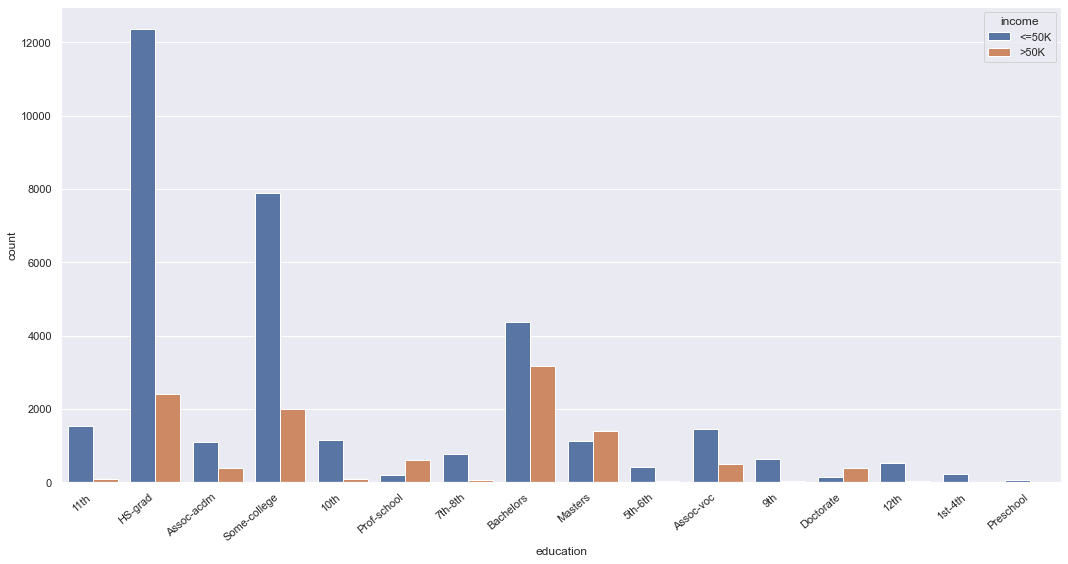

In [31]:
print(df['education'].value_counts()/df['education'].count()*100)

plt.figure(figsize=(15,8))
ax = sns.countplot(df['education'], hue=df['income']);

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show();

Married-civ-spouse       46.578860
Never-married            32.245711
Divorced                 13.932485
Separated                 3.123409
Widowed                   2.826785
Married-spouse-absent     1.221915
Married-AF-spouse         0.070836
Name: marital-status, dtype: float64


<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='marital-status', ylabel='count'>

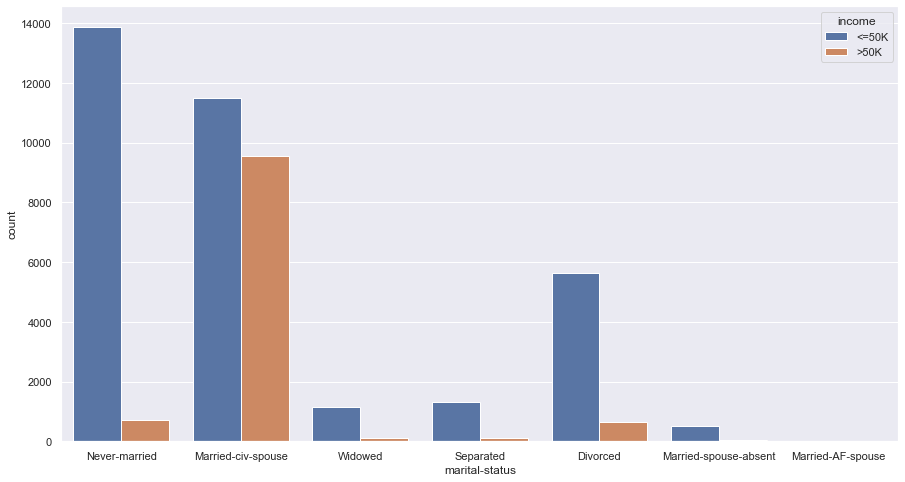

In [32]:
print(df['marital-status'].value_counts()/df['marital-status'].count()*100)

plt.figure(figsize=(15,8))
sns.countplot(df['marital-status'], hue=df['income'])

Husband           41.290537
Not-in-family     25.852795
Own-child         14.645268
Unmarried         10.596569
Wife               4.628666
Other-relative     2.986165
Name: relationship, dtype: float64


<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='relationship', ylabel='count'>

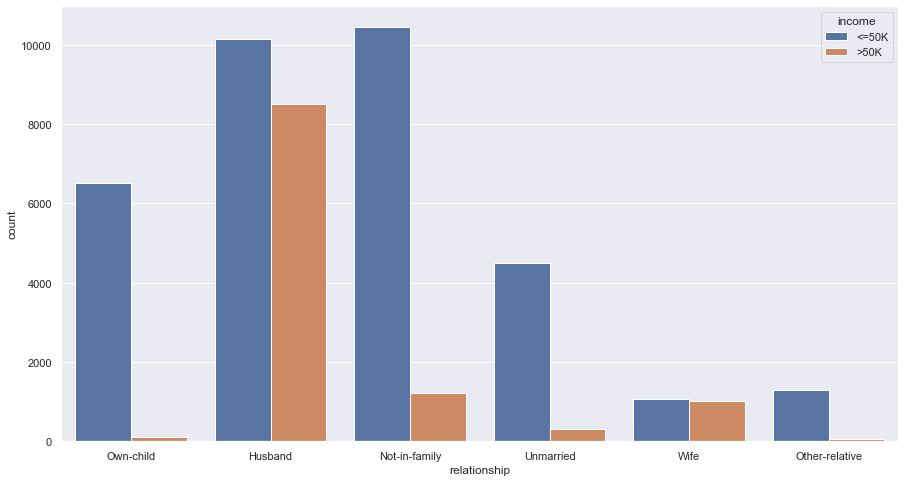

In [33]:
print(df['relationship'].value_counts()/df['relationship'].count()*100)

plt.figure(figsize=(15,8))
sns.countplot(df['relationship'], hue=df['income'])

White                 86.018816
Black                  9.356945
Asian-Pac-Islander     2.879911
Amer-Indian-Eskimo     0.962922
Other                  0.781406
Name: race, dtype: float64


<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='race', ylabel='count'>

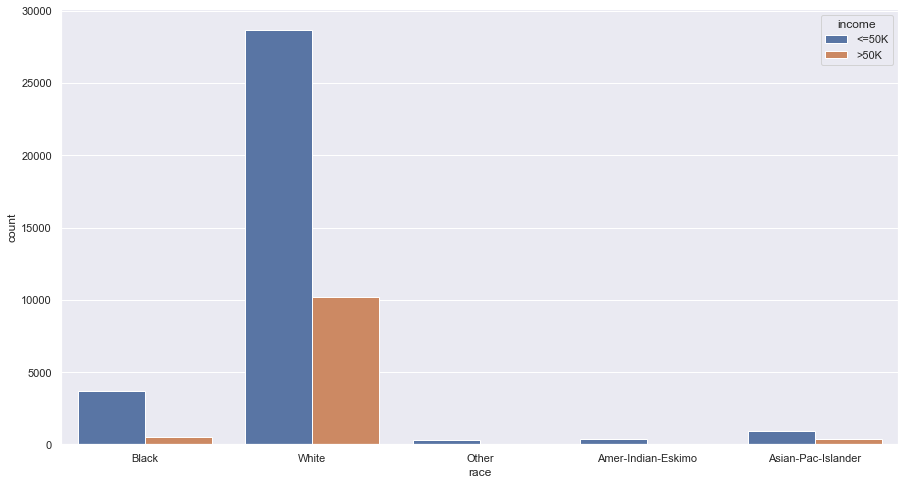

In [34]:
print(df['race'].value_counts()/df['race'].count()*100)

plt.figure(figsize=(15,8))
sns.countplot(df['race'], hue=df['income'])

Male      67.504151
Female    32.495849
Name: gender, dtype: float64


<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='gender', ylabel='count'>

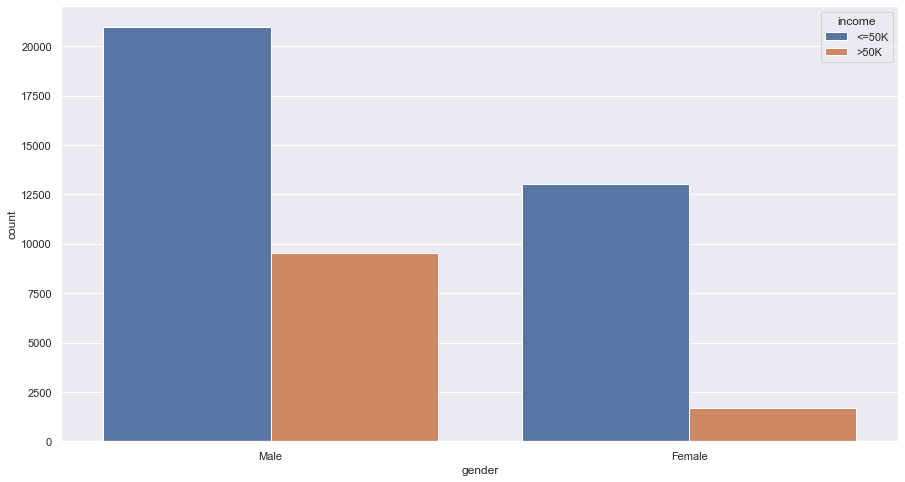

In [35]:
print(df['gender'].value_counts()/df['gender'].count()*100)

plt.figure(figsize=(15,8))
sns.countplot(df['gender'], hue=df['income'])

United-States                 91.324848
Mexico                         1.981184
Philippines                    0.624239
Germany                        0.427227
Puerto-Rico                    0.387382
Canada                         0.360819
El-Salvador                    0.325401
India                          0.325401
Cuba                           0.294411
England                        0.263420
China                          0.250138
Jamaica                        0.228002
South                          0.223575
Italy                          0.221361
Dominican-Republic             0.214721
Japan                          0.197012
Guatemala                      0.185944
Vietnam                        0.183730
Columbia                       0.181516
Poland                         0.179303
Haiti                          0.152739
Portugal                       0.137244
Iran                           0.123962
Taiwan                         0.121749
Greece                         0.108467


<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='native-country', ylabel='count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'United-States'),
  Text(1, 0, 'Peru'),
  Text(2, 0, 'Guatemala'),
  Text(3, 0, 'Mexico'),
  Text(4, 0, 'Dominican-Republic'),
  Text(5, 0, 'Ireland'),
  Text(6, 0, 'Germany'),
  Text(7, 0, 'Philippines'),
  Text(8, 0, 'Thailand'),
  Text(9, 0, 'Haiti'),
  Text(10, 0, 'El-Salvador'),
  Text(11, 0, 'Puerto-Rico'),
  Text(12, 0, 'Vietnam'),
  Text(13, 0, 'South'),
  Text(14, 0, 'Columbia'),
  Text(15, 0, 'Japan'),
  Text(16, 0, 'India'),
  Text(17, 0, 'Cambodia'),
  Text(18, 0, 'Poland'),
  Text(19, 0, 'Laos'),
  Text(20, 0, 'England'),
  Text(21, 0, 'Cuba'),
  Text(22, 0, 'Taiwan'),
  Text(23, 0, 'Italy'),
  Text(24, 0, 'Canada'),
  Text(25, 0, 'Portugal'),
  Text(26, 0, 'China'),
  Text(27, 0, 'Nicaragua'),
  Text(28, 0, 'Honduras'),
  Text(29, 0, 'Iran'),
  Text(30, 0, 'Scotland'),
  T

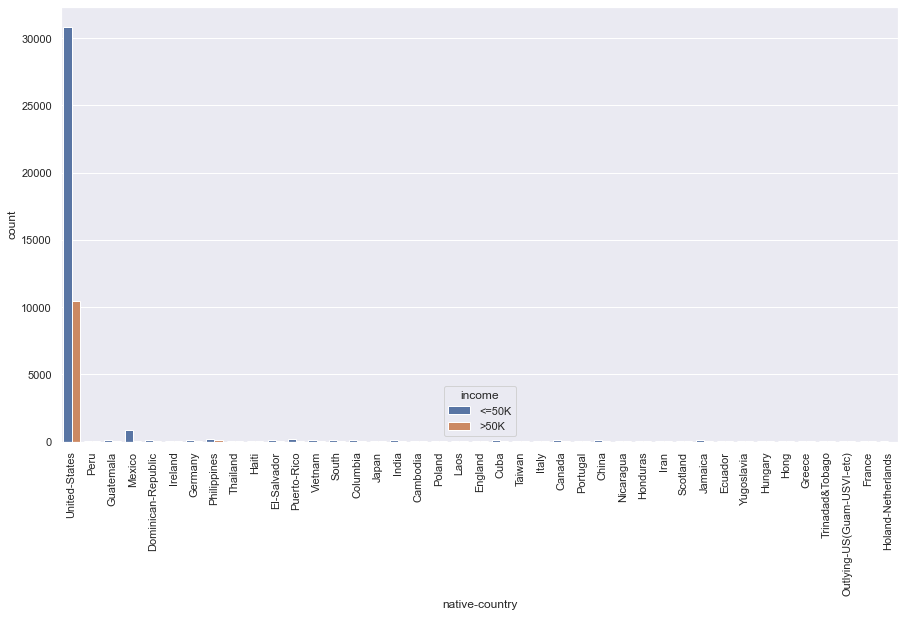

In [36]:
print(df['native-country'].value_counts()/df['native-country'].count()*100)

plt.figure(figsize=(15,8))
sns.countplot(df['native-country'], hue=df['income'])
plt.xticks(rotation=90)
plt.show()

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

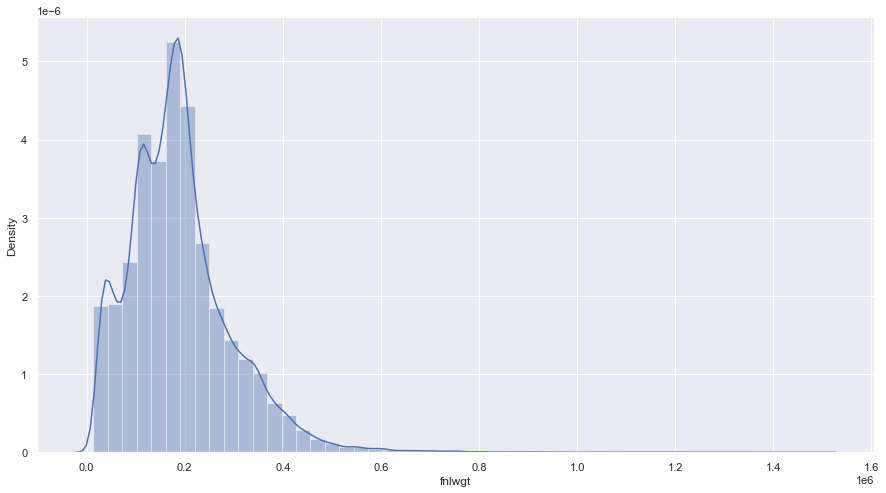

In [37]:
plt.figure(figsize=(15,8))
sns.distplot(df['fnlwgt'])

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='educational-num', ylabel='Density'>

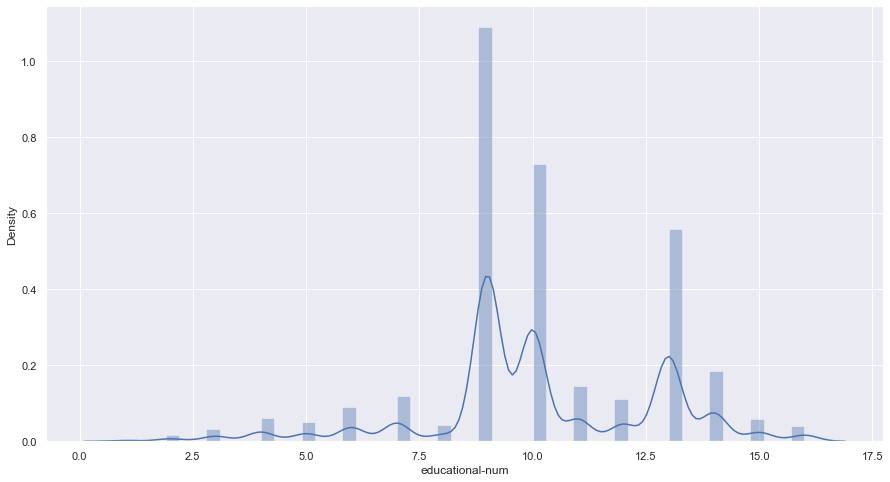

In [38]:
plt.figure(figsize=(15,8))
sns.distplot(df['educational-num'])

In [39]:
df['income'].replace('<=50K', value=0, inplace=True)
df['income'].replace('>50K', value=1, inplace=True)

In [40]:
# Dropping numerical columns in which more than 90% of data come from the same category
# We already saw for categorical columns
dropcols = ['native-country']
for each in numerical_cols.columns:
    if df[each].value_counts(normalize=True).iloc[0] > 0.9:
        dropcols.append(each)
print(dropcols)

['native-country', 'capital-gain', 'capital-loss']


In [41]:
X = df.drop(labels=dropcols+['income'], axis=1)
y = df['income']

<AxesSubplot:xlabel='education', ylabel='educational-num'>

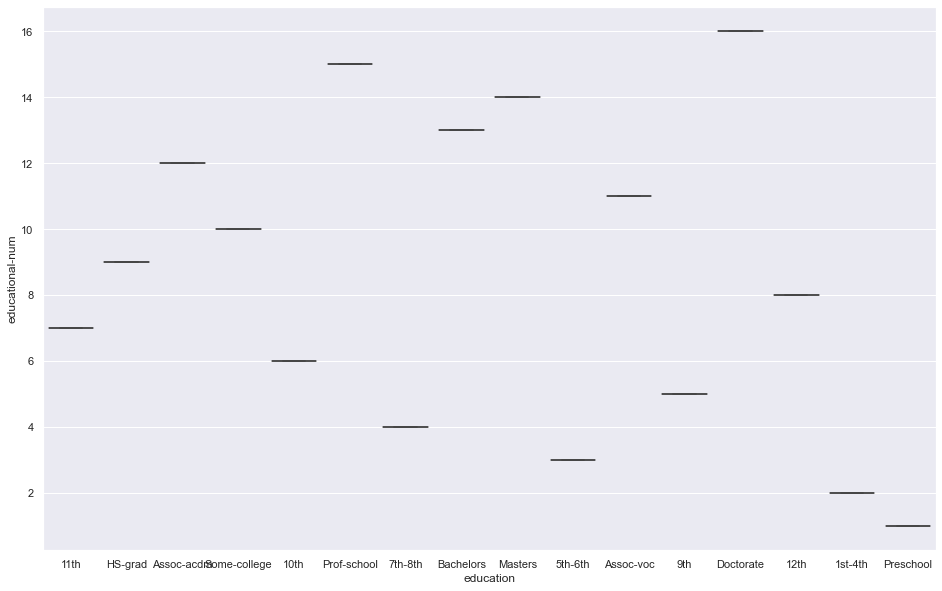

In [43]:
sns.boxplot('education','educational-num',data=X)
plt.show()

In [44]:
X.drop('education',axis=1,inplace=True)

In [45]:
# dropping final weight col
X.drop('fnlwgt',axis=1,inplace=True)

In [46]:
X.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,30


In [47]:
#Listing all options other than white
to_replace = list(X['race'].unique())
to_replace.remove('White')

#Placing all other categories under one bracket
X.replace(to_replace,'Other',inplace=True)
X['race'].value_counts(normalize=True)*100

White    86.018816
Other    13.981184
Name: race, dtype: float64

In [48]:
#Listing all options other than Private
to_replace = list(X['workclass'].unique())
to_replace.remove('Private')

#Placing all other categories under one bracket
X.replace(to_replace,'Non-pvt',inplace=True)
X['workclass'].value_counts(normalize=True)*100

Private    73.62922
Non-pvt    26.37078
Name: workclass, dtype: float64

In [50]:
#Listing all options other than never-married
to_replace = list(X['marital-status'].unique())
to_replace.remove('Never-married')
X.replace('Never-married','Single',inplace=True)
#Placing all other categories under one bracket
X.replace(to_replace,'Married',inplace=True)
X['marital-status'].value_counts(normalize=True)*100

Married    67.754289
Single     32.245711
Name: marital-status, dtype: float64

In [51]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
X = ohe.fit_transform(X)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression(max_iter = 1000)
regression.fit(x_train, y_train )
print("Train Accuracy:",regression.score(x_train, y_train))
print("Test Accuracy:",regression.score(x_test, y_test))

LogisticRegression(max_iter=1000)

Train Accuracy: 0.8368850563319787
Test Accuracy: 0.8294875234773276


In [55]:
# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()

In [56]:
# Define the models evaluation function
def models_evaluation(X, y, folds): 
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)

In [57]:
# Run models_evaluation function
models_evaluation(X, y, 5)

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,Best Score
Accuracy,0.833780,0.833581,0.784483,0.815473,0.468002,Logistic Regression
Precision,0.700133,0.700167,0.571648,0.650307,0.313935,Support Vector Classifier
Recall,0.577040,0.575343,0.522406,0.553562,0.965007,Gaussian Naive Bayes
F1 Score,0.632552,0.631572,0.545893,0.598007,0.473705,Logistic Regression
